In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "IRIS.csv"
iris_data = pd.read_csv(file_path)

# Display basic information and check for null values
print("Dataset Info:\n", iris_data.info())
print("\nMissing Values:\n", iris_data.isnull().sum())
print("\nFirst 5 rows:\n", iris_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Dataset Info:
 None

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

First 5 rows:
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.

In [2]:
# If any null values exist, handle them (e.g., fill with mean)
if iris_data.isnull().values.any():
    iris_data.fillna(iris_data.mean(), inplace=True)
    print("\nNull values filled with column means.\n")


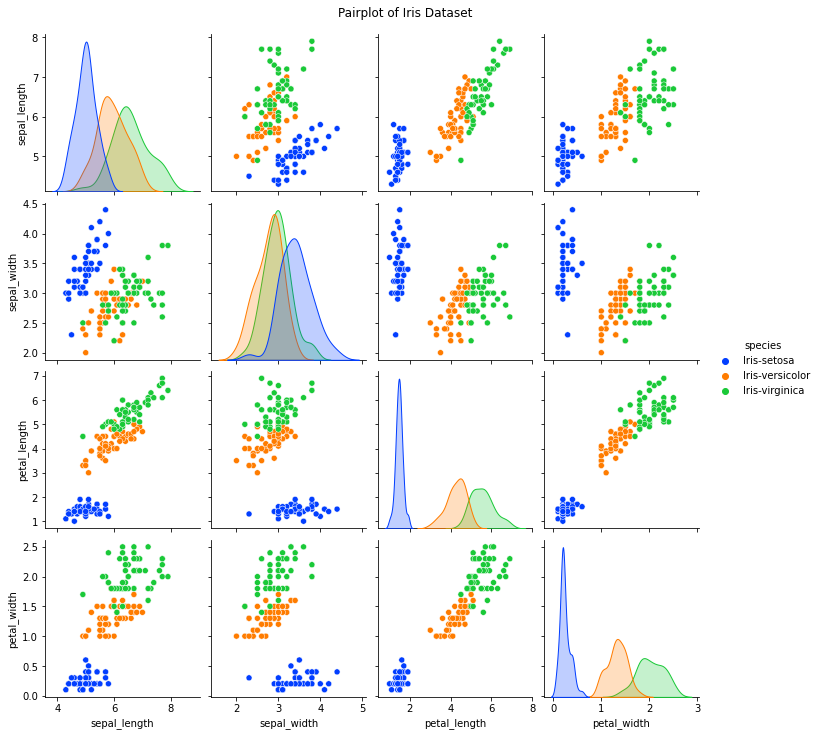

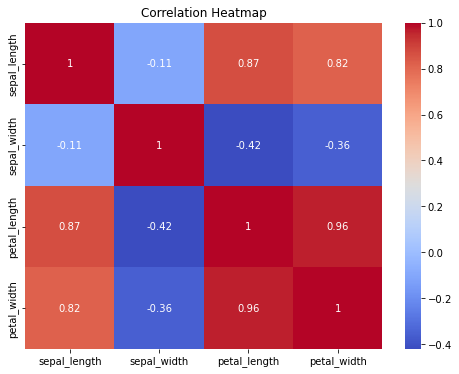

In [3]:
# Pairplot to see distributions and relationships
sns.pairplot(iris_data, hue="species", diag_kind="kde", palette="bright")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [4]:
# Encode species into numeric labels
label_encoder = LabelEncoder()
iris_data["species"] = label_encoder.fit_transform(iris_data["species"])
print("\nEncoded Species:\n", label_encoder.classes_)



Encoded Species:
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
# Split data into features and target
X = iris_data.drop("species", axis=1)
y = iris_data["species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Use Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [7]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
# Prompt the user to input feature values for prediction
print("Enter the measurements for the Iris flower:")
sepal_length = float(input("Sepal Length (cm): "))
sepal_width = float(input("Sepal Width (cm): "))
petal_length = float(input("Petal Length (cm): "))
petal_width = float(input("Petal Width (cm): "))

# Combine the inputs into a list
new_data = [[sepal_length, sepal_width, petal_length, petal_width]]

# Predict the species
prediction = model.predict(new_data)
predicted_species = label_encoder.inverse_transform(prediction)

# Print the predicted species
print(f"\nThe predicted species for the given measurements is: {predicted_species[0]}")


Enter the measurements for the Iris flower:
Sepal Length (cm): 1.2
Sepal Width (cm): 2.3
Petal Length (cm): 3.4
Petal Width (cm): 4.3

The predicted species for the given measurements is: Iris-virginica


C:\Users\mahal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
